# Naive Bayes Full Stack
In this code page, shows how the model were trained and tested using naive bayes algorithm.

In [1]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import naive_bayes, svm
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np


Loading the cleaned dataset and split using stratfied shuffle split

In [2]:
# df = pd.read_csv('e:/Notebook/MODEL/IJ.csv')
df = pd.read_csv('d:/Mini Project/Github/Text Classification/Crime Text Classification/Data/FullTotalCleanedDatasetIndexFinal.csv')
sentences = df['text'].values
y = df['jenayah'].values

sss=StratifiedShuffleSplit(n_splits = 5, test_size=0.2, random_state=1)
sss.get_n_splits(df['text'],df['jenayah'])

for train_index, test_index in sss.split(df['text'],df['jenayah']):
      #print("TRAIN:", train_index, "TEST:", test_index)
    Train_X, Test_X = df['text'][train_index], df['text'][test_index]
    Train_Y, Test_Y = df['jenayah'][train_index],df['jenayah'][test_index]


Vectorized the splited dataset using count vectorizer

In [3]:
le = LabelEncoder()
y_train = le.fit_transform(Train_Y)
y_test = le.fit_transform(Test_Y)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_
vectorizer.transform(sentences).toarray()

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(Train_X)

X_train = vectorizer.transform(Train_X)
X_test  = vectorizer.transform(Test_X)
# print(vectorizer.get_feature_names())

Trained the dataset, and predicted using the Multinomial Naive Bayes algorithm.

In [4]:
nb = naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
predicted = nb.predict(X_test)
predicted_prob = nb.predict_proba(X_test) 



Evaluation of the algorithm using various metrics and figures

Accuracy: 0.814
Accuracy 2: 0.814
Recall/Sensitivity: 0.814
Auc: 0.9742
rate MSE: 0.9742
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1221
           1       0.96      0.64      0.76       107
           2       0.83      0.52      0.64       137
           3       0.98      0.60      0.74        85
           4       0.81      0.94      0.87       324
           5       1.00      0.08      0.15        25
           6       0.89      0.90      0.90       362
           7       0.86      0.92      0.89       707
           8       1.00      0.20      0.33        35
           9       0.95      0.66      0.78        80
          10       1.00      0.04      0.08        24
          11       0.92      0.68      0.78       130
          12       0.00      0.00      0.00        22
          13       0.57      0.34      0.43       220
          14       0.68      0.28      0.40        60
          15       0.59      0.82      0.69   

D:\Programming\envs\SidiPycaret\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\envs\SidiPycaret\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


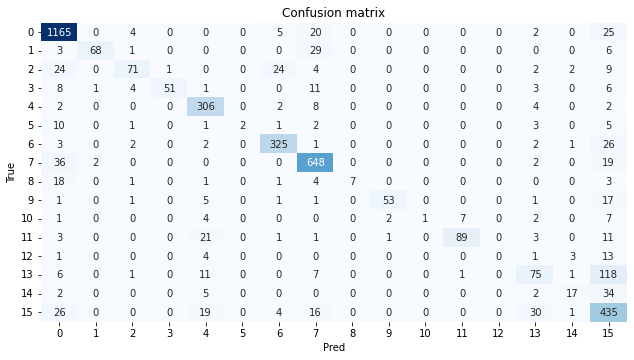

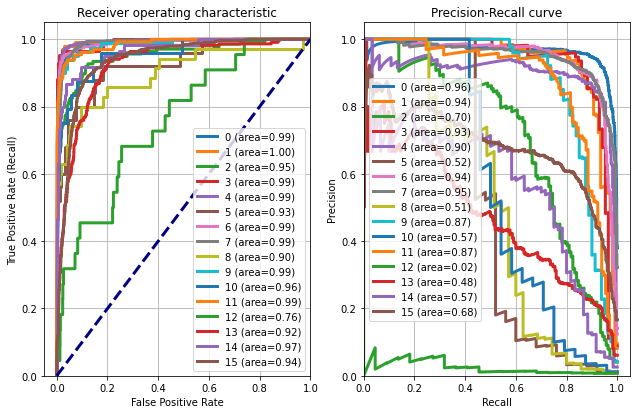

In [5]:
#evaluation

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
accuracy2 = metrics.balanced_accuracy_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted,average='micro')
auc = metrics.roc_auc_score(y_test, predicted_prob, average='weighted',
                            multi_class="ovr")
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, predicted, squared=False)
print("Accuracy:",  round(accuracy,4))
print("Accuracy 2:",  round(accuracy,4))
print("Recall/Sensitivity:",round(recall,4 ))
print("Auc:", round(auc,4))
print("rate MSE:", round(auc,4))
print(metrics.classification_report(y_test, predicted))

## Accuracy,Recall , AUC
accuracy = metrics.accuracy_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted,average='micro')
auc = metrics.roc_auc_score(y_test, predicted_prob, average='weighted',
                            multi_class="ovr")
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, predicted, squared=False)
print("Accuracy:",  round(accuracy,4))
print("Recall/Sensitivity:",round(recall,4 ))
print("Auc:", round(auc,4))
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 5.5, forward=True)
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10.5, 6.5, forward=True)

# fig.savefig('e:/Notebook/MODEL/Baseline_Model/CM nb.png')
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
# fig.savefig('e:/Notebook/MODEL/Baseline_Model/ROC nb.png')
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

# fig.savefig('e:/Notebook/MODEL/Baseline_Model/ROC Precision-Recall curve nb.png')




Manually check the metric calculation using confusion matrix value

In [6]:
confusion_matrix=cm

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)

FP=np.array(FP).tolist()
FP=sum(FP)
FN=np.array(FN).tolist()
FN=sum(FN)
TP=np.array(TP).tolist()
TP=sum(TP)



TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


F1score=TP/(TP+(1/2*(FP+FN)))
print('Accuracy:',ACC)
print('Sensitivity Rate:',TPR)
print('Precision:',TPR)
print('F1 Score:',TPR)

Accuracy: 0.628009828009828
Sensitivity Rate: 0.814004914004914
Precision: 0.814004914004914
F1 Score: 0.814004914004914


D:\Programming\envs\SidiPycaret\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in longlong_scalars
D:\Programming\envs\SidiPycaret\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in longlong_scalars
D:\Programming\envs\SidiPycaret\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in longlong_scalars


exporting and save model for tested on public test set.

In [7]:
import pickle
filename = 'D:/Mini Project/Github/Text Classification/Crime Text Classification/ModelBaselinedNb.sav'
pickle.dump(nb, open(filename, 'wb'))